## Overview of Cars24 Data

## Content
- Overview of Cars24 Data
  - Loading the data
  - Target Variable Encoding and Scaling revised
  - [Predict the Status](https://www.scaler.com/hire/test/problem/16171/)
  - Quiz 1-2
- Data Notation
  - Supervised learning revision
  - Data Notation
- Goal of ML: Generalization
  - Training, testing split
  - Quiz 3
- Linear Regression Intuition
  - Univariate
  - Multivariate
  - [A Linear Hypothesis](https://www.scaler.com/hire/test/problem/16167/)
  - [Optimizing Regression](https://www.scaler.com/hire/test/problem/16173/)
  - Quiz 4-6
- Implementation using Sklearn
  - [Coefficients and Intercept](https://www.scaler.com/hire/test/problem/24118/)

- Evaluation metric
  - MSE and MAE
  - R2 Score
  - [Maxima and Minima of R-squared](https://www.scaler.com/hire/test/problem/24130/)
  - Quiz

<img src='https://drive.google.com/uc?id=11GZXTrohYa8ax9NkbT8EyJued13a0xyS' width=800>



#### Quiz 1
What do you think about the nature of this problem?

#### Choices
- [x] Regression
- [ ] Classification
- [ ] Clustering


<img src='https://drive.google.com/uc?id=1lJiiRZlkPgb83pwgL7OVp1MsSIs4hNZj' width=800>



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!gdown 1qXoDeYVC4vhd7xTNwohxh9dMCjjtoHoJ



Downloading...
From: https://drive.google.com/uc?id=1qXoDeYVC4vhd7xTNwohxh9dMCjjtoHoJ
To: /content/cars24-car-price-cleaned-new.csv
100% 1.55M/1.55M [00:00<00:00, 21.7MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-cleaned-new.csv')
df.head()

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0




<img src='https://drive.google.com/uc?id=1NC99cShk6McQ0VbhDIodjpTwGfpfuJeK' width=800>





### Target variable encoding

In [ ]:
df['model'].nunique(), df['make'].nunique()

(3233, 41)



<img src='https://drive.google.com/uc?id=1JhK5pssMoxwIP2MFmtFJCp9SquJs2AeK' width=800>


<img src='https://drive.google.com/uc?id=1Di8s8QsWUZkEOFb3ceoTtBefJfmrSo3w' width=800>


**Quiz-2** (Check your knowledge)

Q: How do you think we should handle the large number of categories in make and model column?
- [ ] One Hot Encoding
- [ ] Label Encoding
- [x] Target Variable Encoding

For our data,
- we will be using **mean** to encode the columns.

In [ ]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')
df.head()

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


### Scaling the data

Notice one more thing:

- `km_driven` is in the ranges of 10000s,
- while `age` is in the range of 10s.





<img src='https://drive.google.com/uc?id=1816RrFmFMXAYHe4bBtXljxKq2pXTOa16' width=800>






<img src='https://drive.google.com/uc?id=1X_DZeiRvvjMiZfjX5Mx1A7PrviB-n9wR' width=800>


**Tip:** </br>
Apart from MinMaxScaler, you can also try out various methods to see which works the best.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


**Quiz-3** (Check your knowledge)
```
Q: What is the range of values after applying min-max scaling?
a) -1 to 1.
b) 0 to 1.
c) -∞ to +∞.
d) Any arbitrary range specified by the user.

A: b) 0 to 1.
```

## Data Notation

Let's look at few notations we will be following throughout machine learning.


<img src='https://drive.google.com/uc?id=1pTa9eEfBDm2skQ3vr1Amqi6wW2HnGyKU' width=800>


## Goal of ML: Generalization

<img src='https://drive.google.com/uc?id=176m5_ZP32kzwNNtWE5Ndl-7ykxt57eSC' width=800>


<img src='https://drive.google.com/uc?id=1fSCRGI-uvl2D5UaFyWdRt0fLaq7EUby9' width=800>





<img src='https://drive.google.com/uc?id=1J7SlbzRXDHH4O7zQ1FhNZhdWv36osntL' width=800>


<img src='https://drive.google.com/uc?id=1xcQQHhP8BborJTjdYcKYZdH3sDLXyHPF' width=800>

**Quiz-4** (What do you think?)
```
Q: When should you split your data into training and testing sets?
a) Before preprocessing the data.
b) After training the model.
c) After evaluating the model's performance.


A: Before preprocessing the data.
```

Now let's see how we can split our data.

We will be using sklearn's `test_train_split` function for this.

**Note**: Train test split is done before encoding and scaling of data,

**Why?**
- To avoid data leakage




So, we split the original data then scale it

In [ ]:
df1 = pd.read_csv('cars24-car-price-cleaned-new.csv')

Now let's split the data.

We will divide it into 70:30 ratio:
- 70% for training,
- and 30% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_test = train_test_split(df1, test_size=0.3, random_state=1)

Let's check the shape of data after splitting:

In [ ]:
df_train.shape

(13874, 17)

In [ ]:
df_test.shape

(5946, 17)

### Encoding the data

For encoding the train data,
- we can simply replace the value with category wise target mean



For encoding the test data,
- we'll have the get category wise mean from the train data and use that mean while encoding test data.

#### **Why can't we use value from test data?**

Remember that test data is unseen data,
- using the mean from test data will lead to data leakage
- All the params should be from train data.

In [ ]:
make_category_wise_mean = df_train.groupby('make')['selling_price'].mean()
model_category_wise_mean = df_train.groupby('model')['selling_price'].mean()

In [ ]:
df_train['make'] = df_train.groupby('make')['selling_price'].transform('mean')
df_train['model'] = df_train.groupby('model')['selling_price'].transform('mean')


In [ ]:
df_test['make'] = df_test['make'].map(make_category_wise_mean)
df_test['model'] = df_test['model'].map(model_category_wise_mean)

There is a chance that
- a model of car is present in test dataset but not in train dataset

#### **How do we handle this?**

=> We encode it with the global mean of  the train data.

Let's check if there are any NaNs after encoding

In [ ]:
df_test.isna().sum()

,0
selling_price,0
km_driven,0
mileage,0
engine,0
max_power,0
age,0
make,5
model,468
Individual,0
Trustmark Dealer,0


Encoding NaNs with global mean:

In [ ]:
global_mean = df_train['selling_price'].mean()

In [ ]:
df_test['make'] = df_test['make'].fillna(global_mean)
df_test['model'] = df_test['model'].fillna(global_mean)

### Scaling

In [ ]:
scaler = MinMaxScaler()

df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df.columns)

df_test = pd.DataFrame(scaler.transform(df_test), columns=df.columns)

So we have to,
- predict 1 output feature
- using 17 input features.


From our data:
- The output data, `y` is the column `selling_price`
- Remaining columns are the input data, `X`

In [ ]:
y_train = df_train['selling_price']
X_train = df_train.drop('selling_price', axis=1)
y_train.shape, X_train.shape

((13874,), (13874, 16))

In [ ]:
y_test = df_test['selling_price']
X_test = df_test.drop('selling_price', axis=1)
y_test.shape, X_test.shape

((5946,), (5946, 16))

In [ ]:
# X_train.to_pickle('cars24_x_train.pkl')
# y_train.to_pickle('cars24_y_train.pkl')
# X_test.to_pickle('cars24_X_test.pkl')
# y_test.to_pickle('cars24_y_test.pkl')

We will use
- `X_train` and `y_train` to train our model,
- and `X_test` and `y_test` to evaluate the model's performance.

## Linear Regression Intuition

### Univariate


<img src='https://drive.google.com/uc?id=1i0_y1y4htkfSFPxin-Pv7s5zDPQkohgI' width=800>


<img src='https://drive.google.com/uc?id=1h5TQTygmLkn1U4HT0UDJ2xCiTa1R6X4Z' width=800>

<img src='https://drive.google.com/uc?id=1dj5gOCP4Q6YL3ebdzjaLCI8a32cGP3rG' width=800>


<img src='https://drive.google.com/uc?id=1sZmDwv58o9TZ-4APuOSowEYESqj2hpbk' width=800>



<img src='https://drive.google.com/uc?id=1oXW05pUUG29M67EhpROay4IatlWtMjp_' width=800>


**Quiz-5** (Check your knowledge)

```
Q: How many parameters do you need to estimate in a simple linear regression model
(one independent variable)?

a) 1
b) 2
c) Can’t say

A: b) 2

Explanation:
- In simple linear regression, there is one independent variable so 2 coefficients (Y=a+bx).
```

### Multivariate



<img src='https://drive.google.com/uc?id=1_qT0OawmozWToy3GzjYlOcNxGdd75eVU' width=800>



<img src='https://drive.google.com/uc?id=1oOgS0IKvYl9lF-cXdby7hsoBxh16eHji' width=800>


<img src='https://drive.google.com/uc?id=1rnU5hehIy0aBo9TXgbsCJNJ9245Jqjpj' width=800>


<img src='https://drive.google.com/uc?id=1gHUnuY6AMb2MdVqDCqZme9nMQdMQlOAM' width=800>


**Quiz-6** (Check your knowledge)
```
Q: If your data contains d features,
how many dimensions will be required to fit the hyperplane through that data?

a) D
b) D + 1
c) D - 1
d) 2 * D

A: b) D + 1
```

## Lin Reg using sklearn






### Univariate

Let's first take a single variable and train our model.

In [ ]:
X1_train = X_train[['model']]
X1_test = X_test[['model']]

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X1_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([0.99878656])

In [ ]:
model.intercept_

0.0012134449702706496

In [ ]:
y_hat = model.predict(X_test[['model']])

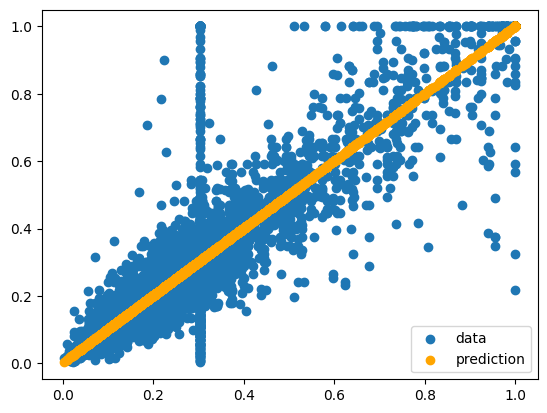

In [ ]:
fig = plt.figure()
plt.scatter(X_test[['model']],y_test,label='data')
plt.scatter(X_test[['model']],y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

Notice,
- how the predicted values form a line similar to a regression line.

### Multivariate

Let's now generalize our model for the whole data.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([-0.22864076, -0.22718566,  0.06493271,  0.04101896, -0.20803904,
        0.06292526,  0.8680704 , -0.00692582, -0.00676553,  0.00537632,
        0.13338991,  0.01451176, -0.00704768, -0.0039257 , -0.01313206,
       -0.02020274])

In [ ]:
model.intercept_

0.11212257190753999

In [ ]:
# import matplotlib.pyplot as plt
# fig = plt.figure()
# y_hat = model.predict(X_test)
# plt.scatter(y_hat,y_test)
# plt.legend()
# plt.show()

## Evaluation Metric


<img src='https://drive.google.com/uc?id=1Kedz1sZmqg6W6zpaLDP3TlqBOGpZzE3M' width=800>



<img src='https://drive.google.com/uc?id=1j-5gRhP53HHgsa75KPKE6fVOaluCr_1D' width=800>



<img src='https://drive.google.com/uc?id=1LmtrH5nVlqk_ZCNN_MsQhC1igtvgKnbO' width=800>


<img src='https://drive.google.com/uc?id=1IAIlSmmRMGVobD3F0S-aWQvK0OUIjQUr' width=800>




<img src='https://drive.google.com/uc?id=15AUqm2RtPKoCqT-luL0dCo3MCGCbDCLG' width=800>




<img src='https://drive.google.com/uc?id=1FPQ4JMtOuloHH-pOkhrp8Zj_ISEQGZVI' width=800>

<img src='https://drive.google.com/uc?id=12wwCXE2bZTS1JWmyK1kbxYssok38w0R1' width=800>

**Note:** </br>
We will be using the above functions later to understand how Linear Regression works under the hood, </br> and the optimization behind it.

**Quiz-7** (What do you think?)
```
Q: In linear regression, if the MSE value is 0, it indicates:

a) The predicted values perfectly match the actual values.
b) The model has no predictive power and fails to explain the dependent variable.
c) The model has high bias and underfits the data.
d) The model has high variance and overfits the data.

A: a) The predicted values perfectly match the actual values.
```

**Quiz-8** (Check your knowledge)

```
Q: How does increasing MSE affect the quality of a regression model?

a) Higher MSE indicates better model performance.
b) Higher MSE indicates worse model performance.
c) MSE does not reflect model quality.
d) MSE only measures the significance of predictor variables.

A: b) Higher MSE indicates worse model performance.
```

**Quiz-9** (Check your knowledge)

```
Q: A model built to predict the sales for a business in the next annual cycle,
has a large negative MSE value on evaluation. What does this mean?

a) Poor model fit
b) Great model fit
c) Can’t be said

A: a) Poor model fit
```

#### What is R2 Score, or the coefficient of determination?



<img src='https://drive.google.com/uc?id=1Eov4qWaDvsH8c94dux8N_BRtTpUttSS-' width=800>




<img src='https://drive.google.com/uc?id=1zNLjxfIjxp9dymK5B4uPOceRqIbCgBFG' width=800>




<img src='https://drive.google.com/uc?id=1oZl0YlksWbt3FvMe_sC_h8RPv1pyf7e2' width=800>



<img src='https://drive.google.com/uc?id=1tODwK1Y_iFVNA9ml14KXSwSGFQsc6BMw' width=800>


**Quiz-10** (Check your knowledge)

```
Que. In a multiple linear regression with five features, the coefficient of determination R2 is found to be 0.85. What does this value indicate about the model's performance?
a) The model explains 85% of the variation in the target variable
b) The model's predictions are 85% accurate
c) The model has an 85% probability of making correct predictions
d) The model is 85% confident in its predictions

Ans: a
Explanation: The coefficient of determination R2 measures the proportion of the variance in the target variable that can be explained by the model. An R2 value of 0.85 indicates that the model explains 85% of the variation in the target variable.


```

**Quiz-11** (Check your knowledge)

```
Q: Multiple models built to predict the trend behind cyber attacks on a company, have R2 scores of 0.1, 0.3, 0.5, 0.9.
Which would be the best model to use?

a) 0.1
b) 0.3
c) 0.5
d) 0.9

A: d) 0.9
```

#### Let's check the performance of our previously trained model on test data.

\
LinearRegression's default `.score()` function uses R2 score to evaluate the data.

In [ ]:
model.score(X_train, y_train)

0.9485893510587335

In [ ]:
model.score(X_test, y_test)

0.8019230466998655